In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats import zscore
!pip install catboost

     |████████████████████████████████| 76.1 MB 52 kB/s 


In [2]:
def additional_info(df):
  print("\n",'*** Shape:',df.shape)

  print("\n",'*** Data:',df.head(10))

  print("\n","*** Columns:", df.columns)

  print("\n",'*** Info:')
  df.info()

  print("\n",'*** Missing values:')
  print(df.isnull().sum())

  print("\n",'*** Data Statistics:')
  print(df.describe(include='all'))

In [3]:

albert = pd.read_csv("albert.csv", low_memory=False)
additional_info(albert)


 *** Shape: (5644, 111)

 *** Data:         Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   
5  75f16746216c4d1                     9               negative   
6  2a2245e360808d7                    13               negative   
7  509197ec73f1400                    16               negative   
8  8bb9d64f0215244                     1               negative   
9  5f1ed301375586c                    17               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3            

In [4]:
# Convert the target column to binary 0 or 1
albert['SARS-Cov-2 exam result'].loc[albert['SARS-Cov-2 exam result'].isin(['negative'])] = 0
albert['SARS-Cov-2 exam result'].loc[albert['SARS-Cov-2 exam result'].isin(['positive'])] = 1
albert['SARS-Cov-2 exam result'] = albert['SARS-Cov-2 exam result'].astype("int64")

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


5086 558


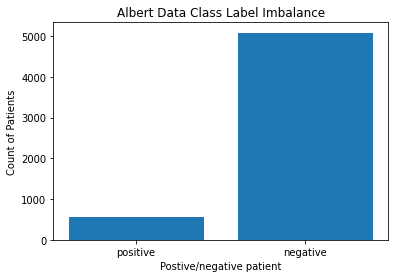

,SARS-Cov-2 exam result
0,0
1,0
2,0
3,0
4,0
...,...
5639,1
5640,0
5641,0
5642,0


In [5]:
#Target feature
count_neg = albert['SARS-Cov-2 exam result'].value_counts()[0]
count_pos = albert['SARS-Cov-2 exam result'].value_counts()[1]

print (count_neg, count_pos)
plt.bar(['positive', 'negative'], [count_pos, count_neg])
plt.title('Albert Data Class Label Imbalance')
plt.xlabel('Postive/negative patient')
plt.ylabel('Count of Patients')
plt.show()

y = pd.DataFrame(albert['SARS-Cov-2 exam result'])
y

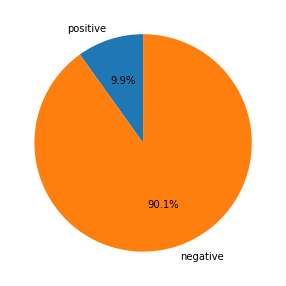

In [ ]:
labels = ['positive', 'negative']
sizes = [count_pos, count_neg]
fig1, ax1 = plt.subplots(1,1, figsize=(5,5))
wedges, text, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

Highly imbalanced data

In [ ]:
data = albert[['SARS-Cov-2 exam result','Alanine transaminase','Aspartate transaminase', 'Proteina C reativa mg/dL', 'Lactic Dehydrogenase', 'Leukocytes', 'Lymphocytes', 'Neutrophils', 'Patient age quantile', 'Platelets', 'Basophils', 'Eosinophils', 'Monocytes', 'Alkaline phosphatase', 'Gamma-glutamyltransferase\xa0']]
data.head()

,SARS-Cov-2 exam result,Alanine transaminase,Aspartate transaminase,Proteina C reativa mg/dL,Lactic Dehydrogenase,Leukocytes,Lymphocytes,Neutrophils,Patient age quantile,Platelets,Basophils,Eosinophils,Monocytes,Alkaline phosphatase,Gamma-glutamyltransferase
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,-0.147895,NaN,-0.09461,0.318366,-0.619086,17,-0.517413,-0.223767,1.482158,0.357547,NaN,NaN
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.dtypes

SARS-Cov-2 exam result          int64
Alanine transaminase          float64
Aspartate transaminase        float64
Proteina C reativa mg/dL      float64
Lactic Dehydrogenase          float64
Leukocytes                    float64
Lymphocytes                   float64
Neutrophils                   float64
Patient age quantile            int64
Platelets                     float64
Basophils                     float64
Eosinophils                   float64
Monocytes                     float64
Alkaline phosphatase          float64
Gamma-glutamyltransferase     float64
dtype: object

## Null Value Impute
### KNN impute

In [ ]:
# KNN Imputation
columns= data.columns
imputer = KNNImputer(n_neighbors=20)
impute = imputer.fit_transform(data)
data = pd.DataFrame(data=impute, columns=columns)
data.head(5)

,SARS-Cov-2 exam result,Alanine transaminase,Aspartate transaminase,Proteina C reativa mg/dL,Lactic Dehydrogenase,Leukocytes,Lymphocytes,Neutrophils,Patient age quantile,Platelets,Basophils,Eosinophils,Monocytes,Alkaline phosphatase,Gamma-glutamyltransferase
0,0.0,-0.143030,-0.249295,-0.225289,-0.366416,0.244473,-0.222802,0.145083,13.0,-0.200227,0.570427,-0.125459,-0.274083,-0.357600,-0.018395
1,0.0,0.209798,0.124245,-0.147895,-0.226748,-0.094610,0.318366,-0.619086,17.0,-0.517413,-0.223767,1.482158,0.357547,-0.230463,0.317965
2,0.0,-0.280853,-0.299616,-0.136072,-0.600294,0.042164,0.162284,0.007000,8.0,0.132033,0.142784,0.140019,-0.058725,-0.593603,-0.290739
3,0.0,-0.001072,-0.226069,-0.265526,-0.388157,0.123282,0.001512,-0.099533,5.0,-0.014941,-0.116856,-0.001148,0.092288,-0.258631,-0.155409
4,0.0,0.000306,-0.158329,-0.055201,-0.295264,-0.091549,-0.099984,0.134840,15.0,0.042216,-0.009945,-0.154957,-0.039028,-0.359123,-0.004356


In [ ]:
data.isnull().sum()

SARS-Cov-2 exam result        0
Alanine transaminase          0
Aspartate transaminase        0
Proteina C reativa mg/dL      0
Lactic Dehydrogenase          0
Leukocytes                    0
Lymphocytes                   0
Neutrophils                   0
Patient age quantile          0
Platelets                     0
Basophils                     0
Eosinophils                   0
Monocytes                     0
Alkaline phosphatase          0
Gamma-glutamyltransferase     0
dtype: int64

## Outiler Removal
### Z Score

In [ ]:
new_data = data.copy(deep=True)
z_scores = abs(zscore(new_data))
filtered = (z_scores<4.0).all(axis=1)
new_df = new_data[filtered]
new_df.shape

(5385, 15)

In [ ]:
y = new_df['SARS-Cov-2 exam result']
X = new_df.drop(['SARS-Cov-2 exam result'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4308, 14) (1077, 14) (4308,) (1077,)


## Algorithms

In [ ]:
#Libraries
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from datetime import datetime

from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score, precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
scores = {'Algos':['RFC', 'XGB','LGBM','CatB','VC'], 'Specificity':[], 'Sensitivity':[], 'Precision':[], 'F1':[]}

### RandomForest Classification

In [ ]:
rf_params={
 "max_depth"    : [3, 5, 8, 10, 12, 15],
 "n_estimators" : [5, 10, 20, 50, 100, 150] 
}

def score(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    for train_idx, val_idx in cv.split(X_train,y_train):
        train_X, val_X = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(train_X, train_y)
    
    specificity = make_scorer(recall_score, pos_label=0)
    spc_score = cross_val_score(model, X_test, y_test, cv=cv, scoring=specificity)

    sensitivity = make_scorer(recall_score, pos_label=1)
    sns_score = cross_val_score(model, X_test, y_test, cv=cv, scoring=sensitivity)
    
    prs_score = cross_val_score(model, X_test, y_test, cv=cv, scoring='precision')
    
    f1_score = cross_val_score(model, X_test, y_test, cv=cv, scoring='f1')
    
    return spc_score, sns_score, prs_score, f1_score

In [ ]:
#3 iter

model = RandomForestClassifier(random_state=1)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
random_search = RandomizedSearchCV(model, param_distributions=rf_params, n_iter=3, scoring='f1',n_jobs=-1,cv=cv, random_state=3)

start_time = timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())


 Time taken: 0 hours 0 minutes and 25.09 seconds.
Best Params:  {'n_estimators': 20, 'max_depth': 12}
Best Estimator:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [ ]:
model_rf = RandomForestClassifier(n_estimators=20, max_depth=12, random_state=1)

spc, sns, prs, f1 = score(model_rf)

spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
99.53 %
Sensitivity (Recall): 
94.89 %
Precision: 
95.95 %
F1-Score: 
95.21 %


###VC params


In [ ]:
RF_ = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=12, 
                             max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, 
                             min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=20, 
                             n_jobs=None, oob_score=False, random_state=1, verbose=0, warm_start=False)

XGBOOST_ = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, 
                         gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5, min_child_weight=1, missing=None, 
                         n_estimators=100, n_jobs=1, nthread=None, objective='binary:logistic', random_state=1, reg_alpha=0, 
                         reg_lambda=1, scale_pos_weight=1, seed=None, silent=None, subsample=1, verbosity=1)

LGBM_ = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
                       max_depth=5, min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0, n_estimators=100, n_jobs=-1, 
                       num_leaves=31, objective=None, random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0, 
                       subsample_for_bin=200000, subsample_freq=0)

CATB_ = CatBoostClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_strength=1)

models = [('RF',RF_),('XGBOOST',XGBOOST_),('LGBM',LGBM_), ('CATBOOST',CATB_)]

### Boosting set-up

In [ ]:
params={
 "learning_rate"    : [0.01, 0.05, 0.10, 0.15, 0.20],
 "max_depth"        : [3, 5, 8, 10, 12, 15],
 "n_estimators"     : [5, 10, 20, 50, 100, 150] 
}

In [ ]:
#Cross Validate function
def cross_validate(model):
    if model=="xgb":
        model = XGBClassifier(random_state=1)
    if model=="lgbm":
        model = LGBMClassifier(random_state=1)
    if model=="catb":
        model = CatBoostClassifier(random_strength=1)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    
    random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=3, scoring='f1',n_jobs=-1,cv=cv, random_state=3)
    start_time = timer(None)
    random_search.fit(X_train,y_train)
    timer(start_time)
    
    return random_search

def score(model, n=None, d=None, r=None):
    if model=="xgb":
        classifier = XGBClassifier(n_estimators=n, max_depth=d, learning_rate=r, random_state=1)
    if model=="lgbm":
        classifier = LGBMClassifier(n_estimators=n, max_depth=d, learning_rate=r,random_state=1)
    if model=="catb":
        classifier = CatBoostClassifier(n_estimators=n, max_depth=d, learning_rate=r,random_strength=1)
    if model=="vc":
        classifier=VotingClassifier(estimators=models, voting='soft')
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

    for train_idx, val_idx in cv.split(X_train,y_train):
        train_X, val_X = X_train.iloc[train_idx, :], X_train.iloc[val_idx, :]
        train_y, val_y = y_train.iloc[train_idx], y_train.iloc[val_idx]
        classifier.fit(train_X, train_y)

    specificity = make_scorer(recall_score, pos_label=0)
    spc_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring=specificity)

    sensitivity = make_scorer(recall_score, pos_label=1)
    sns_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring=sensitivity)
    
    prs_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='precision')
    
    f1_score = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='f1')
    
    return spc_score, sns_score, prs_score, f1_score

### XGBoost Classifier

In [ ]:
random_search = cross_validate("xgb")  #3 iter


 Time taken: 0 hours 0 minutes and 24.32 seconds.


In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [ ]:
spc, sns, prs, f1 = score("xgb", 100, 5, 0.1)

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
99.3 %
Sensitivity (Recall): 
96.95 %
Precision: 
94.24 %
F1-Score: 
95.36 %


### LGBM Classifier

In [ ]:
random_search = cross_validate("lgbm")   # 3 iter


 Time taken: 0 hours 0 minutes and 8.29 seconds.


In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 1, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [ ]:
spc, sns, prs, f1 = score("lgbm", 100, 5, 0.1)

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
99.4 %
Sensitivity (Recall): 
96.56 %
Precision: 
95.02 %
F1-Score: 
95.62 %


### CatBoost Classifier

In [ ]:
random_search = cross_validate("catb") # 3 iter

0:	learn: 0.6113458	total: 49.7ms	remaining: 4.92s
1:	learn: 0.5495425	total: 52.8ms	remaining: 2.58s
2:	learn: 0.4919687	total: 55.4ms	remaining: 1.79s
3:	learn: 0.4467746	total: 57.7ms	remaining: 1.39s
4:	learn: 0.4000190	total: 60.4ms	remaining: 1.15s
5:	learn: 0.3594399	total: 63ms	remaining: 987ms
6:	learn: 0.3253084	total: 65.5ms	remaining: 871ms
7:	learn: 0.2964401	total: 68.2ms	remaining: 784ms
8:	learn: 0.2690928	total: 70.6ms	remaining: 714ms
9:	learn: 0.2482520	total: 73.3ms	remaining: 660ms
10:	learn: 0.2278009	total: 75.9ms	remaining: 614ms
11:	learn: 0.2080948	total: 78.4ms	remaining: 575ms
12:	learn: 0.1943806	total: 80.9ms	remaining: 541ms
13:	learn: 0.1792629	total: 83.7ms	remaining: 514ms
14:	learn: 0.1649114	total: 86.4ms	remaining: 490ms
15:	learn: 0.1527313	total: 89.5ms	remaining: 470ms
16:	learn: 0.1424090	total: 93.9ms	remaining: 458ms
17:	learn: 0.1343033	total: 96.6ms	remaining: 440ms
18:	learn: 0.1237946	total: 99.3ms	remaining: 423ms
19:	learn: 0.1153892	tot

In [ ]:
print("Best Params: ",random_search.best_params_)
print("Best Estimator: ",random_search.best_estimator_.get_params())

Best Params:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Estimator:  {'learning_rate': 0.1, 'random_strength': 1, 'max_depth': 5, 'n_estimators': 100}


In [ ]:
spc, sns, prs, f1 = score("catb", 100, 5, 0.1)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6246247	total: 1.2ms	remaining: 119ms
1:	learn: 0.5676115	total: 2.71ms	remaining: 133ms
2:	learn: 0.5184016	total: 4.06ms	remaining: 131ms
3:	learn: 0.4764460	total: 5.5ms	remaining: 132ms
4:	learn: 0.4326382	total: 6.92ms	remaining: 131ms
5:	learn: 0.3981538	total: 8.36ms	remaining: 131ms
6:	learn: 0.3711261	total: 10.4ms	remaining: 138ms
7:	learn: 0.3408347	total: 12ms	remaining: 138ms
8:	learn: 0.3137563	total: 13.5ms	remaining: 137ms
9:	learn: 0.2900019	total: 17.4ms	remaining: 157ms
10:	learn: 0.2674990	total: 18.8ms	remaining: 152ms
11:	learn: 0.2533372	total: 20.3ms	remaining: 149ms
12:	learn: 0.2382551	total: 23.7ms	remaining: 159ms
13:	learn: 0.2223534	total: 25.1ms	remaining: 154ms
14:	learn: 0.2063838	total: 26.5ms	remaining: 150ms
15:	learn: 0.1947016	total: 27.9ms	remaining: 146ms
16:	learn: 0.1839199	total: 29.3ms	remaining: 143ms
17:	learn: 0.1737742	total: 30.6ms	remaining: 140ms
18:	learn: 0.1639577	total:

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
99.28 %
Sensitivity (Recall): 
91.31 %
Precision: 
93.7 %
F1-Score: 
92.11 %


### Voting Classifier

In [ ]:
spc, sns, prs, f1 = score("vc")

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6246247	total: 1.12ms	remaining: 111ms
1:	learn: 0.5676115	total: 2.81ms	remaining: 138ms
2:	learn: 0.5184016	total: 4.08ms	remaining: 132ms
3:	learn: 0.4764460	total: 5.43ms	remaining: 130ms
4:	learn: 0.4326382	total: 7.17ms	remaining: 136ms
5:	learn: 0.3981538	total: 8.4ms	remaining: 132ms
6:	learn: 0.3711261	total: 9.93ms	remaining: 132ms
7:	learn: 0.3408347	total: 11.3ms	remaining: 130ms
8:	learn: 0.3137563	total: 12.6ms	remaining: 127ms
9:	learn: 0.2900019	total: 13.9ms	remaining: 125ms
10:	learn: 0.2674990	total: 15.2ms	remaining: 123ms
11:	learn: 0.2533372	total: 16.4ms	remaining: 120ms
12:	learn: 0.2382551	total: 17.9ms	remaining: 120ms
13:	learn: 0.2223534	total: 19.2ms	remaining: 118ms
14:	learn: 0.2063838	total: 20.5ms	remaining: 116ms
15:	learn: 0.1947016	total: 21.9ms	remaining: 115ms
16:	learn: 0.1839199	total: 23.2ms	remaining: 113ms
17:	learn: 0.1737742	total: 24.5ms	remaining: 111ms
18:	learn: 0.1639577	tot

In [ ]:
spc_score = round((np.mean(spc)*100.0), 2)
sns_score = round((np.mean(sns)*100.0),2)
prs_score = round((np.mean(prs)*100.0),2)
f1_score = round((np.mean(f1)*100.0),2)

scores['Specificity'].append(spc_score)
scores['Sensitivity'].append(sns_score)
scores['Precision'].append(prs_score)
scores['F1'].append(f1_score)

print("Specificity: ")
print(spc_score,"%")
print("Sensitivity (Recall): ")
print(sns_score,"%")
print("Precision: ")
print(prs_score,"%")
print("F1-Score: ")
print(f1_score,"%")

Specificity: 
99.32 %
Sensitivity (Recall): 
96.56 %
Precision: 
94.24 %
F1-Score: 
95.21 %


###Graphs

In [ ]:
results = pd.DataFrame(scores)
resm = results.melt('Algos', var_name='Metrics', value_name='values')
resm

,Algos,Metrics,values
0,RFC,Specificity,99.53
1,XGB,Specificity,99.30
2,LGBM,Specificity,99.40
3,CatB,Specificity,99.28
4,VC,Specificity,99.32
5,RFC,Sensitivity,94.89
6,XGB,Sensitivity,96.95
7,LGBM,Sensitivity,96.56
8,CatB,Sensitivity,91.31
9,VC,Sensitivity,96.56


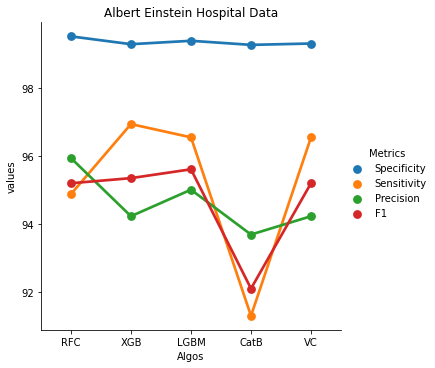

In [ ]:
sns.catplot(x='Algos', y="values", hue="Metrics", data=resm, kind="point").set(title="Albert Einstein Hospital Data")